In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

## 4.3 ロジスティック回帰

### 4.3.2 ロジスティック回帰

ロジスティック回帰の問題

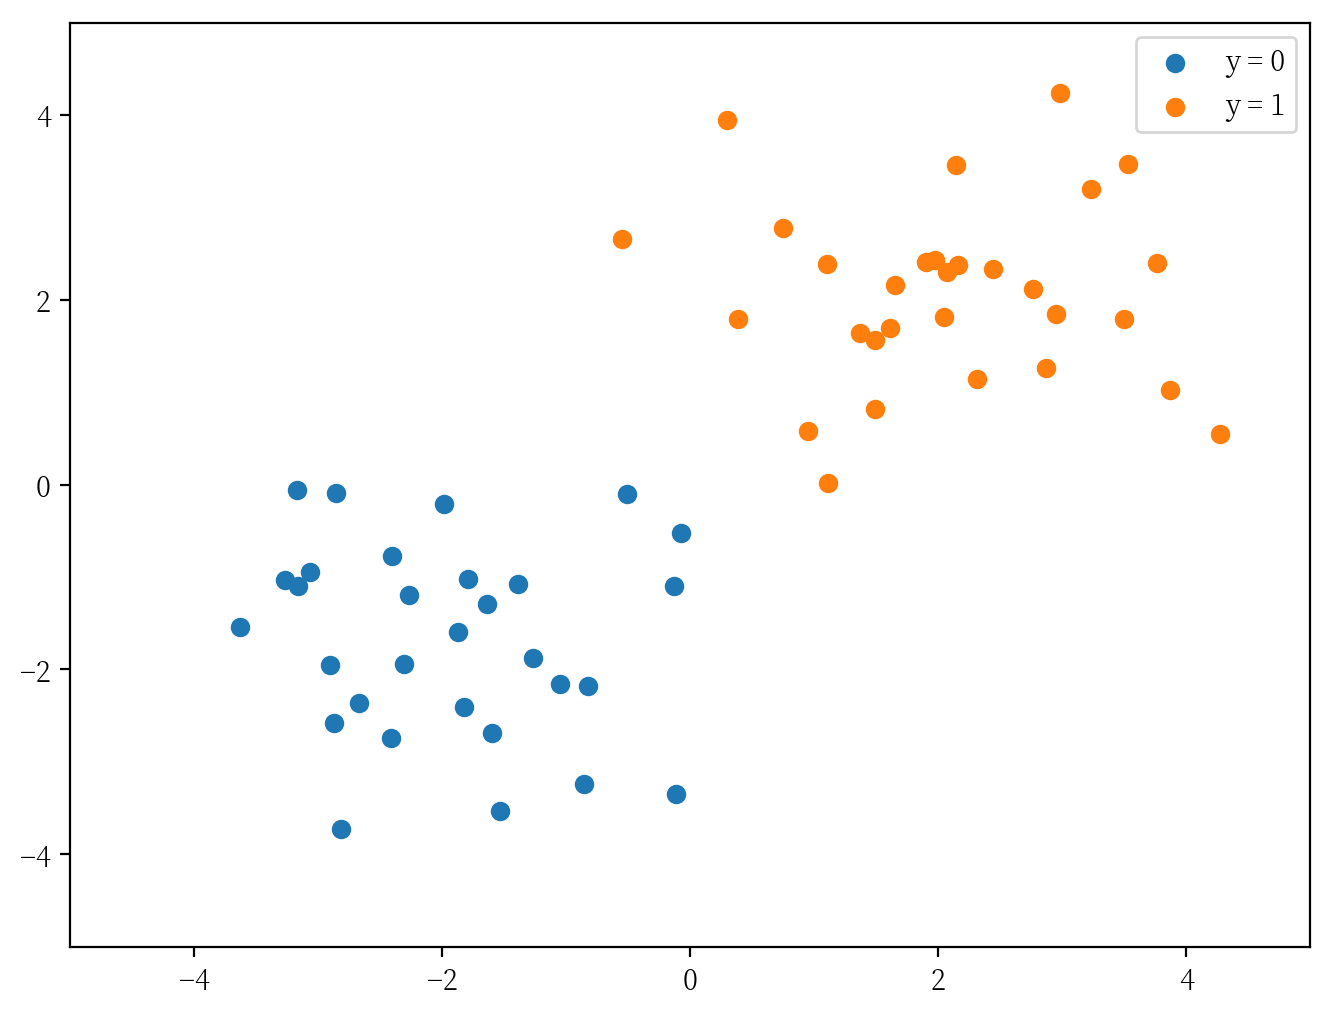

In [2]:
np.random.seed(0)

N = 30
X1 = np.random.multivariate_normal([2,2], [[1,0],[0,1]], N)
X2 = np.random.multivariate_normal([-2,-2], [[1,0],[0,1]], N)
X = np.r_[X1, X2]
y = np.where(np.dot(X, [1,1]) > 0, 1, 0)

cmap = plt.get_cmap("tab10")

for i, y_i in enumerate(np.unique(y)):
    X_i = X[y == y_i]
    plt.scatter(X_i[:,0], X_i[:,1], c=cmap(i), label='y = %d' % i)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [28]:
@np.vectorize
def sigmoid(x):
    sigmoid_range = 34.538776394910684

    if x <= -sigmoid_range:
        return 1e-15
    if x >= sigmoid_range:
        return 1.0 - 1e-15

    return 1.0 / (1.0 + np.exp(-x))
    
class LogisticRegression:
    def __init__(self, eta=0.01):
        self.n_samples = None
        self.n_features = None
        self.Phi = None
        self.w = None
        self.eta = eta
        self.n_trained = 0
    
    def train_init(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.Phi_train = np.c_[np.ones(self.n_samples)[:,None], X]
        self.X_train = X
        self.y_train = y
        self.w = np.random.normal(0, 1, self.n_features + 1)
        self.n_trained = 0
    
    def train(self):
        err = self.predict_sigmoid(self.X_train) - self.y_train
        grad = self.Phi_train.T.dot(err)
        self.w = self.w - self.eta * grad
        self.n_trained += 1
        
    def predict(self, X):
        N, M = X.shape
        assert(self.n_features == M)
        
        Phi = np.c_[np.ones(N)[:,None], X]
        return np.where(Phi.dot(self.w) > 0, 1, 0)
        
    def predict_sigmoid(self, X):
        N, M = X.shape
        assert(self.n_features == M)
        
        Phi = np.c_[np.ones(N)[:,None], X]
        return sigmoid(Phi.dot(self.w))
    

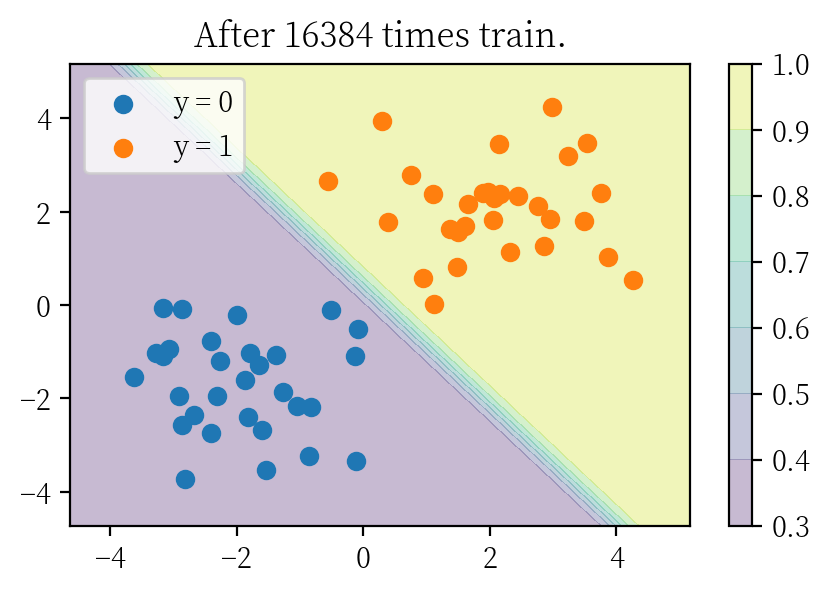

In [40]:
clf = LogisticRegression(eta=0.01)

np.random.seed(3)
clf.train_init(X,y)

h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(figsize=(5,3))

Z = clf.predict_sigmoid(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contour = ax.contourf(xx, yy, Z, alpha=0.3)
fig.colorbar(contour)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

def update(f):
    ax.cla()
    
    Z = clf.predict_sigmoid(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

    pred = clf.predict(X)
    cmap = plt.get_cmap("tab10")
    for i, y_i in enumerate(np.unique(pred)):
        X_i = X[pred == y_i]
        ax.scatter(X_i[:,0], X_i[:,1], c=cmap(i), label='y = %d' % i)
    ax.legend()
    
    ax.set_title('After %d times train.' % clf.n_trained)
    
    train_times = 2**f
    for _ in range(train_times):
        clf.train()

n_frames = 14
ani = animation.FuncAnimation(fig, update, n_frames)
ani.save("output.gif", writer="imagemagick")
